# Projet 5  : Segmentez des clients d'un site e-commerce

Vous êtes consultant pour Olist, une entreprise brésilienne qui propose une solution de vente sur les marketplaces en ligne.

 

La page d'accueil du site Olist
La page d'accueil du site Olist
Olist souhaite que vous fournissiez à ses équipes d'e-commerce une segmentation des clients qu’elles pourront utiliser au quotidien pour leurs campagnes de communication.

Votre objectif est de comprendre les différents types d’utilisateurs grâce à leur comportement et à leurs données personnelles.

Vous devrez fournir à l’équipe marketing une description actionable de votre segmentation et de sa logique sous-jacente pour une utilisation optimale, ainsi qu’une proposition de contrat de maintenance basée sur une analyse de la stabilité des segments au cours du temps.

Les données
Pour cette mission, Olist vous fournit une base de données anonymisée comportant des informations sur l’historique de commandes, les produits achetés, les commentaires de satisfaction, et la localisation des clients depuis janvier 2017.

Votre mission
Votre mission est d’aider les équipes d’Olist à comprendre les différents types d'utilisateurs. Vous utiliserez donc des méthodes non supervisées pour regrouper des clients de profils similaires. Ces catégories pourront être utilisées par l’équipe Marketing pour mieux communiquer.

Vous créez donc un notebook et démarrez votre travail d’analyse exploratoire.



Après quelques premières analyses, vous vous rendez compte qu’Olist ne vous a pas fourni beaucoup de données ; vous enquêtez donc auprès de l’entreprise pour obtenir quelques informations complémentaires, et vérifier que vous avez bien compris la mission. Voici sa réponse.

 

Bonjour, 

Pour des raisons de confidentialité, nous ne pouvons pas vous fournir beaucoup de données à ce stade. Ensuite, en raison de ressources limitées, nous avons dû vous fournir l’ensemble des données, alors que seule une partie va vous intéresser. Nos dashboards internes nous indiquent en effet que seuls 3 % des clients du fichier de données partagé avec vous ont réalisé plusieurs commandes.

Nous sommes confiants sur le fait que les données à disposition suffiront pour réaliser un premier clustering. Cela a déjà été fait par d’autres prestataires par le passé, avec encore moins de données.

La segmentation proposée doit être exploitable et facile d’utilisation par notre équipe Marketing. Elle doit au minimum pouvoir différencier les bons et moins bons clients en termes de commandes et de satisfaction. Nous attendons bien sûr une segmentation sur l’ensemble des clients.

Dans un deuxième temps, une fois le modèle de segmentation choisi, nous souhaiterions  que vous nous fassiez une recommandation de fréquence à laquelle la segmentation doit être mise à jour pour rester pertinente, afin de pouvoir effectuer un devis de contrat de maintenance.

Pour information, le code fourni doit respecter la convention PEP8, pour être utilisable par Olist.

Bien à vous,

Juan, de l’équipe Marketing

Vous réalisez donc trois autres documents afin de préparer une réponse à Olist : 

un notebook avec des essais des différentes approches de modélisation ;
un notebook de simulation pour déterminer la fréquence nécessaire de mise à jour du modèle de segmentation, afin que celui-ci reste pertinent ; 
une présentation pour un collègue afin d’obtenir ses retours sur votre approche.

# Sommaire



## I. Importation des données

### 1. Importation des bibliothèques

### 2. Importation du fichier




## II. Maintenance

### 1. Préparation des données
#### 1.1 Création des fichiers
#### 1.2 Agrégation des fichiers

### 2.Entrainement des modèles
#### 2.1 Entrainement du modèle de référence
#### 2.2 Entrainement des modèles mensuels

### 3. Résultats de la maintenance



## III. Conclusion du projet 5

# 

## I. Importation des données

### A. Importation des bibliothèques

In [1]:
# Importation bibliothèque

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno

import folium

import datetime

import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import adjusted_rand_score

### B. Importation du fichier

In [2]:
data = pd.read_csv("fichier_maintenance.csv")

data.head(5)

,customer_unique_id,order_id,order_purchase_timestamp,order_item_id,review_score,Total_paiements,recency
0,0000366f3b9a7992bf8c76cfdf3221e2,e22acc9c116caa3f2b7121bbb380d08e,2018-05-10,1.0,5.0,141.90,112
1,0000b849f77a49e4a4ce2b2a4ca5be3f,3594e05a005ac4d06a72673270ef9ec9,2018-05-07,1.0,4.0,27.19,115
2,0000f46a3911fa3c0805444483337064,b33ec3b699337181488304f362a6b734,2017-03-10,1.0,3.0,86.22,538
3,0000f6ccb0745a6a4b88665a16c9f078,41272756ecddd9a9ed0180413cc22fb6,2017-10-12,1.0,4.0,43.62,322
4,0004aac84e0df4da2b147fca70cf8255,d957021f1127559cd947b62533f484f7,2017-11-14,1.0,5.0,196.89,289


# 

## II. Maintenance

### A. Création des fichiers

In [3]:
# Fichier sur Janvier 

data_ref= data[(data["order_purchase_timestamp"] >= '2017-01-01') & (data["order_purchase_timestamp"] <= '2017-12-31')]


# Fichier sur Février
data1= data[(data["order_purchase_timestamp"] >= '2017-02-01') & (data["order_purchase_timestamp"] <= '2018-01-31')]


# Fichier sur Mars
data2= data[(data["order_purchase_timestamp"] >= '2017-03-01') & (data["order_purchase_timestamp"] <= '2018-02-28')]


# Fichier sur Avril
data3= data[(data["order_purchase_timestamp"] >= '2017-04-01') & (data["order_purchase_timestamp"] <= '2018-03-31')]


# Fichier sur Mai
data4= data[(data["order_purchase_timestamp"] >= '2017-05-01') & (data["order_purchase_timestamp"] <= '2018-04-30')]


# Fichier sur Juin
data5= data[(data["order_purchase_timestamp"] >= '2017-06-01') & (data["order_purchase_timestamp"] <= '2018-05-31')]


# Fichier sur Juillet
data6= data[(data["order_purchase_timestamp"] >= '2017-07-01') & (data["order_purchase_timestamp"] <= '2018-06-30')]


# Fichier sur Août
data7= data[(data["order_purchase_timestamp"] >= '2017-08-01') & (data["order_purchase_timestamp"] <= '2018-07-31')]


In [4]:
# Visualisation du fichier de référence

data_ref.head(10)

,customer_unique_id,order_id,order_purchase_timestamp,order_item_id,review_score,Total_paiements,recency
2,0000f46a3911fa3c0805444483337064,b33ec3b699337181488304f362a6b734,2017-03-10,1.0,3.0,86.22,538
3,0000f6ccb0745a6a4b88665a16c9f078,41272756ecddd9a9ed0180413cc22fb6,2017-10-12,1.0,4.0,43.62,322
4,0004aac84e0df4da2b147fca70cf8255,d957021f1127559cd947b62533f484f7,2017-11-14,1.0,5.0,196.89,289
8,0005e1862207bf6ccc02e4228effd9a0,ae76bef74b97bcb0b3e355e60d9a6f9c,2017-03-04,1.0,4.0,150.12,544
10,0006fdc98a402fceb4eb0ee528f6a8d4,6681163e3dab91c549952b2845b20281,2017-07-18,1.0,3.0,29.00,408
11,00082cbe03e478190aadbea78542e933,67503374d1fbcbe5e3a40324f703ffc8,2017-11-19,1.0,5.0,126.26,284
14,000a5ad9c4601d2bbdd9ed765d5213b3,f7fa5cf8386e51037856df1add3e1228,2017-08-11,1.0,4.0,91.28,384
15,000bfa1d2f1a41876493be685390d6d3,fd61441ba2a7b57e6342862e779b10b0,2017-09-29,2.0,4.5,93.70,335
16,000c8bdb58a29e7115cfc257230fb21b,34801c59d6ec5c5e89bfefb6ebef314d,2017-12-12,1.0,5.0,29.00,261
18,000de6019bb59f34c099a907c151d855,c6d61340bd8baeedca7cc8e7f7ec07e9,2017-08-17,1.0,2.0,257.44,378


In [5]:
# Visulation du fichier de Janvier

data1

,customer_unique_id,order_id,order_purchase_timestamp,order_item_id,review_score,Total_paiements,recency
2,0000f46a3911fa3c0805444483337064,b33ec3b699337181488304f362a6b734,2017-03-10,1.0,3.0,86.22,538
3,0000f6ccb0745a6a4b88665a16c9f078,41272756ecddd9a9ed0180413cc22fb6,2017-10-12,1.0,4.0,43.62,322
4,0004aac84e0df4da2b147fca70cf8255,d957021f1127559cd947b62533f484f7,2017-11-14,1.0,5.0,196.89,289
8,0005e1862207bf6ccc02e4228effd9a0,ae76bef74b97bcb0b3e355e60d9a6f9c,2017-03-04,1.0,4.0,150.12,544
10,0006fdc98a402fceb4eb0ee528f6a8d4,6681163e3dab91c549952b2845b20281,2017-07-18,1.0,3.0,29.00,408
...,...,...,...,...,...,...,...
96205,fffbf87b7a1a6fa8b03f081c5f51a201,64397307c6954ae1ad2ad8e791ad8a31,2017-12-27,1.0,5.0,167.32,246
96206,fffcf5a5ff07b0908bd4e2dbc735a684,725cf8e9c24e679a8a5a32cb92c9ce1e,2017-06-08,1.0,5.0,2067.42,448
96207,fffea47cd6d3cc0a88bd621562a9d061,c71b9252fd7b3b263aaa4cb09319a323,2017-12-10,1.0,4.0,84.58,263
96208,ffff371b4d645b6ecea244b27531430a,fdc45e6c7555e6cb3cc0daca2557dbe1,2017-02-07,1.0,5.0,112.46,569


# 

In [6]:
# Agrégation des différents jeux de données.


# Fichier de référence
data_ref = data_ref.groupby(['customer_unique_id'], as_index = False).agg({'order_item_id': 'sum',
                                   'review_score': 'mean',
                                   'Total_paiements': 'sum',
                                   'recency': 'min'})

# Fichier de Janvier
data_test1 = data1.groupby(['customer_unique_id'], as_index = False).agg({'order_item_id': 'sum',
                                   'review_score': 'mean',
                                   'Total_paiements': 'sum',
                                   'recency': 'min'})


# Fichier de Février
data_test2 = data2.groupby(['customer_unique_id'], as_index = False).agg({'order_item_id': 'sum',
                                   'review_score': 'mean',
                                   'Total_paiements': 'sum',
                                   'recency': 'min'})

# Fichier de Mars
data_test3 = data3.groupby(['customer_unique_id'], as_index = False).agg({'order_item_id': 'sum',
                                   'review_score': 'mean',
                                   'Total_paiements': 'sum',
                                   'recency': 'min'})

# Fichier d'Avril
data_test4 = data4.groupby(['customer_unique_id'], as_index = False).agg({'order_item_id': 'sum',
                                   'review_score': 'mean',
                                   'Total_paiements': 'sum',
                                   'recency': 'min'})

# Fichier de Mai
data_test5 = data5.groupby(['customer_unique_id'], as_index = False).agg({'order_item_id': 'sum',
                                   'review_score': 'mean',
                                   'Total_paiements': 'sum',
                                   'recency': 'min'})

# Fichier de Juin
data_test6 = data6.groupby(['customer_unique_id'], as_index = False).agg({'order_item_id': 'sum',
                                   'review_score': 'mean',
                                   'Total_paiements': 'sum',
                                   'recency': 'min'})


# Fichier de Juillet
data_test7 = data7.groupby(['customer_unique_id'], as_index = False).agg({'order_item_id': 'sum',
                                   'review_score': 'mean',
                                   'Total_paiements': 'sum',
                                   'recency': 'min'})


In [7]:
# Suppression des colonnes non utiles à l'entrainement des modèles

data_ref.drop(columns = ['customer_unique_id'], inplace = True)
data_test1.drop(columns = ['customer_unique_id'], inplace = True)
data_test2.drop(columns = ['customer_unique_id'], inplace = True)
data_test3.drop(columns = ['customer_unique_id'], inplace = True)
data_test4.drop(columns = ['customer_unique_id'], inplace = True)
data_test5.drop(columns = ['customer_unique_id'], inplace = True)
data_test6.drop(columns = ['customer_unique_id'], inplace = True)
data_test7.drop(columns = ['customer_unique_id'], inplace = True)

# 

### 2.Entrainement des modèles

#### 2.1. Entrainement du modèle de référence

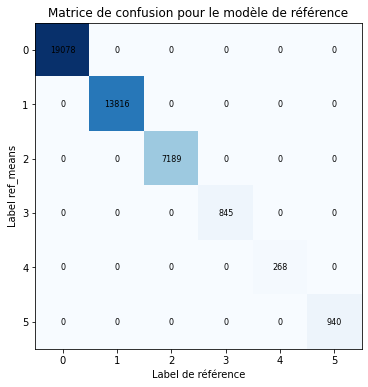

In [8]:
# Standardisation de nos données

sc = StandardScaler() 


data_ref = sc.fit_transform(data_ref)

# Entrainement du modèle de référence

model_ref = KMeans(n_clusters = 6)
model_ref.fit(data_ref)

label1 = model_ref.predict(data_ref)

# Vérification de notre métrique

label_ref = model_ref.labels_

adjusted_rand_score(label_ref, label1)
# Compute confusion matrix

cm = confusion_matrix(label_ref, label1)

# Plot confusion matrix
plt.figure(figsize = (6,6))
plt.imshow(cm,interpolation='none',cmap='Blues')
for (i, j), z in np.ndenumerate(cm):
    plt.text(j, i, z, ha='center', va='center', fontsize = 8)
plt.xlabel("Label de référence")
plt.ylabel("Label ref_means")
plt.title('Matrice de confusion pour le modèle de référence')
plt.show()

#### 2.2 Entrainement des modèles mensuels

Le score pour janvier est de : 0.9905712768796824


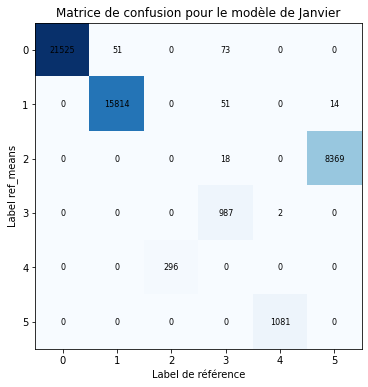

In [9]:
# Entrainement du modèle de Janvier


data_test1 = sc.fit_transform(data_test1)
label_janvier_ref = model_ref.predict(data_test1)

model_janvier = KMeans(n_clusters = 6)
model_janvier.fit(data_test1)

M0 = model_ref.predict(data_test1)
M1 = model_janvier.predict(data_test1)
ARS1 = adjusted_rand_score(M0, M1)
print('Le score pour janvier est de :', ARS1)

# Matrice de confusion

# Compute confusion matrix

cm = confusion_matrix(M0, M1)

# Plot confusion matrix
plt.figure(figsize = (6,6))
plt.imshow(cm,interpolation='none',cmap='Blues')
for (i, j), z in np.ndenumerate(cm):
    plt.text(j, i, z, ha='center', va='center', fontsize = 8)
plt.xlabel("Label de référence")
plt.ylabel("Label ref_means")
plt.title('Matrice de confusion pour le modèle de Janvier')
plt.show()

### Février

Le score pour février est de : 0.9773221321886295


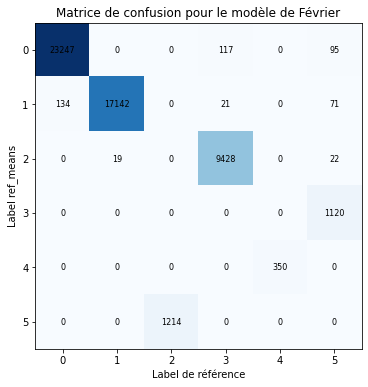

In [10]:
# Entrainement d'un nouveau modèle avec nos différents mois

data_test2 = sc.fit_transform(data_test2)
label_fevrier_ref = model_ref.predict(data_test2)

model_fevrier = KMeans(n_clusters = 6)
model_fevrier.fit(data_test2)

M0 = model_ref.predict(data_test2)
M2 = model_fevrier.predict(data_test2)
ARS2 = adjusted_rand_score(M0, M2)
print('Le score pour février est de :', ARS2)

# Matrice de confusion

# Compute confusion matrix

cm = confusion_matrix(M0, M2)

# Plot confusion matrix
plt.figure(figsize = (6,6))
plt.imshow(cm,interpolation='none',cmap='Blues')
for (i, j), z in np.ndenumerate(cm):
    plt.text(j, i, z, ha='center', va='center', fontsize = 8)
plt.xlabel("Label de référence")
plt.ylabel("Label ref_means")
plt.title('Matrice de confusion pour le modèle de Février')
plt.show()

Le score pour mars est de : 0.9327739077034085


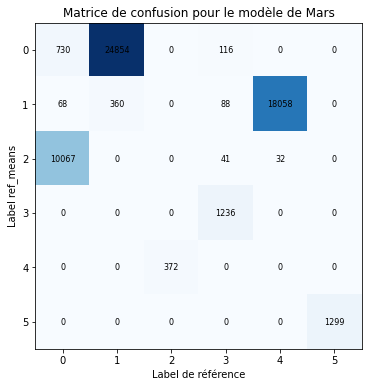

In [11]:
# Mois de Mars


label_mars_ref = model_ref.predict(data_test3)
data_test3 = sc.fit_transform(data_test3)

model_mars = KMeans(n_clusters = 6)
model_mars.fit(data_test3)

M0 = model_ref.predict(data_test3)
M3 = model_mars.predict(data_test3)
ARS3 = adjusted_rand_score(M0, M3)
print('Le score pour mars est de :', ARS3)

# Matrice de confusion

# Compute confusion matrix

cm = confusion_matrix(M0, M3)

# Plot confusion matrix
plt.figure(figsize = (6,6))
plt.imshow(cm,interpolation='none',cmap='Blues')
for (i, j), z in np.ndenumerate(cm):
    plt.text(j, i, z, ha='center', va='center', fontsize = 8)
plt.xlabel("Label de référence")
plt.ylabel("Label ref_means")
plt.title('Matrice de confusion pour le modèle de Mars')
plt.show()

Le score pour avril est de : 0.9420076804615399


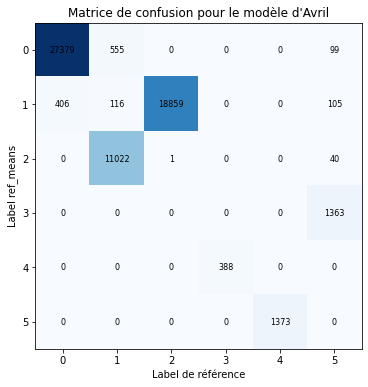

In [12]:
# Mois d'Avril

data_test4 = sc.fit_transform(data_test4)
label_avril_ref = model_ref.predict(data_test4)


model_avril = KMeans(n_clusters = 6)
model_avril.fit(data_test4)

M0 = model_ref.predict(data_test4)
M4 = model_avril.predict(data_test4)
ARS4 = adjusted_rand_score(M0, M4)
print('Le score pour avril est de :', ARS4)

# Matrice de confusion

# Compute confusion matrix

cm = confusion_matrix(M0, M4)

# Plot confusion matrix
plt.figure(figsize = (6,6))
plt.imshow(cm,interpolation='none',cmap='Blues')
for (i, j), z in np.ndenumerate(cm):
    plt.text(j, i, z, ha='center', va='center', fontsize = 8)
plt.xlabel("Label de référence")
plt.ylabel("Label ref_means")
plt.title("Matrice de confusion pour le modèle d'Avril")
plt.show()

Le score pour mai est de : 0.8729734303012318


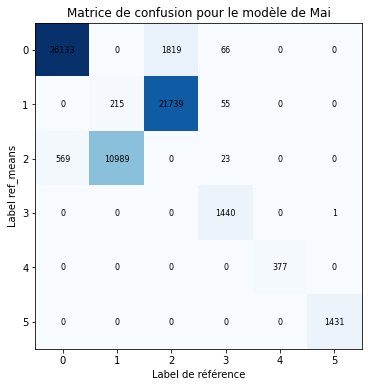

In [13]:
# Mois de Mai

data_test5 = sc.fit_transform(data_test5)
label_mai_ref = model_ref.predict(data_test5)


model_mai = KMeans(n_clusters = 6)
model_mai.fit(data_test5)

M0 = model_ref.predict(data_test5)
M5 = model_mai.predict(data_test5)
ARS5 = adjusted_rand_score(M0, M5)
print('Le score pour mai est de :', ARS5)

# Matrice de confusion

# Compute confusion matrix

cm = confusion_matrix(M0, M5)

# Plot confusion matrix
plt.figure(figsize = (6,6))
plt.imshow(cm,interpolation='none',cmap='Blues')
for (i, j), z in np.ndenumerate(cm):
    plt.text(j, i, z, ha='center', va='center', fontsize = 8)
plt.xlabel("Label de référence")
plt.ylabel("Label ref_means")
plt.title('Matrice de confusion pour le modèle de Mai')
plt.show()

Le score pour juin est de : 0.8972624480020003


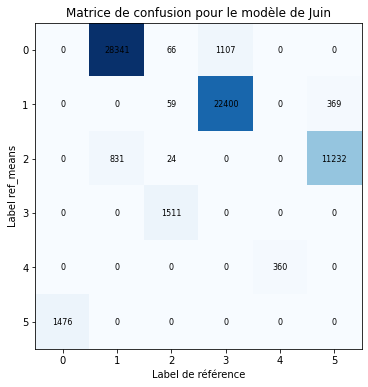

In [14]:
# Mois de Juin

data_test6 = sc.fit_transform(data_test6)
label_juin_ref = model_ref.predict(data_test6)



model_juin = KMeans(n_clusters = 6)
model_juin.fit(data_test6)

M0 = model_ref.predict(data_test6)
M6 = model_juin.predict(data_test6)
ARS6 = adjusted_rand_score(M0, M6)
print('Le score pour juin est de :', ARS6)

# Matrice de confusion

# Compute confusion matrix

cm = confusion_matrix(M0, M6)

# Plot confusion matrix
plt.figure(figsize = (6,6))
plt.imshow(cm,interpolation='none',cmap='Blues')
for (i, j), z in np.ndenumerate(cm):
    plt.text(j, i, z, ha='center', va='center', fontsize = 8)
plt.xlabel("Label de référence")
plt.ylabel("Label ref_means")
plt.title('Matrice de confusion pour le modèle de Juin')
plt.show()

Le score pour juillet est de : 0.828857717097552


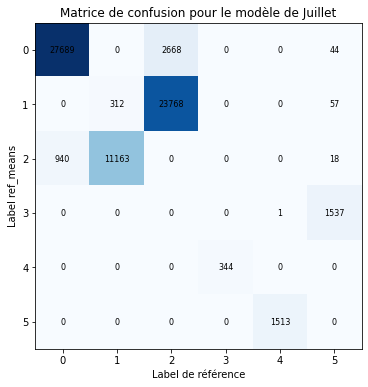

In [15]:
# Mois de Juillet

data_test7 = sc.fit_transform(data_test7)
label_juillet_ref = model_ref.predict(data_test7)


model_juillet = KMeans(n_clusters = 6)
model_juillet.fit(data_test7)

M0 = model_ref.predict(data_test7)
M7 = model_juillet.predict(data_test7)
ARS7 = adjusted_rand_score(M0, M7)
print('Le score pour juillet est de :', ARS7)

# Matrice de confusion

# Compute confusion matrix

cm = confusion_matrix(M0, M7)

# Plot confusion matrix
plt.figure(figsize = (6,6))
plt.imshow(cm,interpolation='none',cmap='Blues')
for (i, j), z in np.ndenumerate(cm):
    plt.text(j, i, z, ha='center', va='center', fontsize = 8)
plt.xlabel("Label de référence")
plt.ylabel("Label ref_means")
plt.title('Matrice de confusion pour le modèle de Juillet')
plt.show()

# 

### 3. Résultats de la maintenance

In [16]:
# Création du fichier des résultats

Score = [ARS1, ARS2, ARS3, ARS4, ARS5, ARS6, ARS7]
Mois = ['Janvier', 'Février', 'Mars', 'Avril', 'Mai', 'Juin', 'Juillet']


data_score = pd.DataFrame ({'Mois': Mois, 'Score Maintenance': Score})
data_score

,Mois,Score Maintenance
0,Janvier,0.990571
1,Février,0.977322
2,Mars,0.932774
3,Avril,0.942008
4,Mai,0.872973
5,Juin,0.897262
6,Juillet,0.828858


Text(0, 0.5, 'Score')

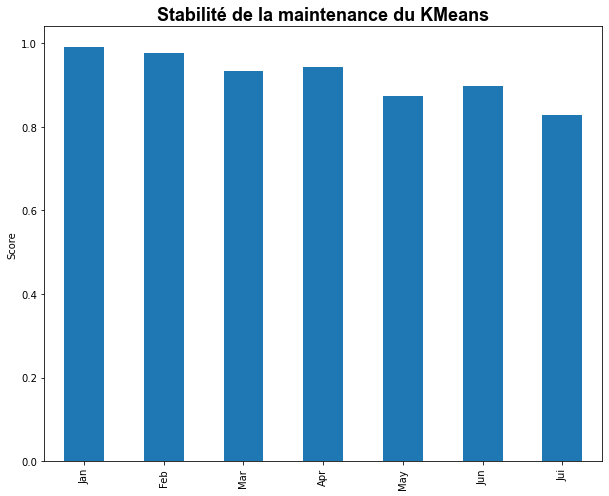

In [17]:
# Visualisation de nos résultats

title = {"family": "arial",
              "color":  "black",
              "weight": "bold",
              "size": 18}

plt.figure(figsize = (10,8))
data_score['Score Maintenance'].plot(kind = 'bar')
plt.title("Stabilité de la maintenance du KMeans",
         fontdict = title)
plt.xticks(np.arange(0,7), ['Jan','Feb','Mar','Apr','May','Jun', 'Jui'])
plt.ylabel('Score')


Notre graphique indique que la maintenance serait optimisée tous les 7 mois. Nous allons garder cette idée de pratiquer la maintenance de notre segmentation chaque semestre.

# 

# III. Conclusion du projet 5

En conclusion, nous pouvons dire que nous avons pu procéder au traitement de la problématique de segmentation de la clientèle.

Afin de procéder à cette segmentation, nous avons procéder, en amont, à l'analyse de l'ensemble des fichiers fournis par la société.
Cette méthode nous a permis de procéder à un filtre de notre clientèle afin de ne conserver que les clients sans valeurs atypiques, qui seront pour leur part traiter dans un listing très spécifique et très facilement identifiable dans le cadre de notre problématique.

Ce traitement des données a notamment permis de ressortir une très forte présence de clients ayant uniquement effectué un seul achat (sur les données fournies).

Afin de procéder à notre segmentation, nous avons utilisé plusieurs méthodologies, à savoir :

- La Méthode RFM (Recence Frequence Monetary) qui donne une base fondamentale pour notre analyse. Cette méthode nous notamment permis d'obtenir une première analyse de notre client de manière marketing. Nous avons par la suite procéder à la segmentation de nos données qui nous a conduit a séparé notre clientèle en 7 groupes séparés.

- Nous avons ensuite pratiqué la méthode de l'ACP dans le but de mieux étudier le rôle de nos variables et d'en ressortir des données nous permettant d'avancer sur notre projet.

- RFM + moyenne commentaire : l'ajout de cette variable a permis de mieux appréhender nos données et ainsi de confirmer une segmentation précise. Nous ressortons de notre analyse avec 6 clusters définis et nous permettant de répondre à la problématique de notre projet.

Pour effectuer la segmentation, nous avons utilisé les méthodes du K-Means, du DBSCAN et du Clustering Hiérarchique. Nous pouvons affirmer que la méthode du K-Means a présenté les résultats les plus intéressants et cette méthodologie va nous permettre de proposer, auprès du service marketing, notre segmentation pour le développement et la pérénisation de l'entreprise.


Dans le cadre de la maintenance, nous avons pu procéder à une analyse sur la durée recommandée nous permettant de mettre à jour notre modélisation.
Après analyse sur une période glissante d'une année, nous pouvons considérer que le mois de juillet (c'est à dire tous les 7 mois) est la période optimale pour procéder à une mise à jour de notre modèle.


Enfin, nous pouvons nous interroger sur le listing fourni. En effet, malgré une résolution de la problématique initiale. Il est important de s'interroger sur l'intégralité du fichier (par exemple sur une durée de 5 ou 10 ans). Cette possibilité pourrait conduire à une analyse plus approfondie notamment sur le nombre d'achats de la part des consommateurs. Il est probable que certains clients aient effectués plusieurs achats mais les documents fournis ne contiennent que 2 années d'étude des données.